## Twitter data extract

In [1]:
# Load libraries
import pandas as pd
import time
import json

# Load Twitter API client
from searchtweets import ResultStream, gen_rule_payload, load_credentials, collect_results

### Define API arguments

In [2]:
# Define arguments to be able to connect to Twitter API for the last 30 days of tweets
premium_30day_search_args = load_credentials(filename=".twitter_keys.yaml",
                 yaml_key="search_30day_tweets_api",
                 env_overwrite=False)

# Define arguments to be able to connect to Twitter API for the last 30 days of tweets
premium_fullarchive_search_args = load_credentials(filename=".twitter_keys.yaml",
                 yaml_key="search_fullarchive_tweets_api",
                 env_overwrite=False)


Grabbing bearer token from OAUTH
Grabbing bearer token from OAUTH


### Extract last 30 days data

In [3]:
# Extract last 30 days tweets using Twitter API
# This is due to tweets older than 30 days use a different end point and limit quota

write_to_disk = False
if write_to_disk:
    all_tweets = []
    for t in list(range(1,30)):
        from_date = str(t).zfill(2)
        to_date = str(t+1).zfill(2)

        rule = gen_rule_payload(
            "UK coronavirus lang:en",
            from_date=f"2020-05-{from_date}", 
            to_date=f"2020-05-{to_date}",
            results_per_call=100
        )

        tweets = collect_results(rule, max_results=500, result_stream_args=premium_30day_search_args) 

        all_tweets.extend(tweets)
        print(len(all_tweets))
        # Set a sleep time to avoid hitting API limits
        time.sleep(10)

        # Write extacted tweets to a JSON file
        with open('data/tweets/data.json', 'w', encoding='utf-8') as f:
            json.dump(all_tweets, f, indent=4, ensure_ascii=False)
        
        

### Extract data older than 30 days

In [4]:
# Extract tweets older than 30 days
# This is due to tweets older than 30 days use a different end point and limit quota

# Extract tweets older then 30 days using Twitter API
write_to_disk = False
if write_to_disk:
    month = '04' # specify month number
    for t in list(range(1,30)):
        from_date = str(t).zfill(2)
        to_date = str(t+1).zfill(2)

        rule = gen_rule_payload(
            "UK coronavirus lang:en",
            from_date=f"2020-{month}-{from_date}", 
            to_date=f"2020-{month}-{to_date}",
            results_per_call=100
        )

        tweets = collect_results(rule, max_results=150, result_stream_args=premium_fullarchive_search_args) 

        all_tweets.extend(tweets)
        print(f"2020-{month}-{to_date}")
        print(len(all_tweets))
        print('---')
        # Set a sleep time to avoid hitting API limits
        time.sleep(10)

        # Write extacted tweets to a JSON file
        with open('data/tweets/data.json', 'w', encoding='utf-8') as f:
            json.dump(all_tweets, f, indent=4, ensure_ascii=False)

### Load tweet data

In [5]:
# Read JSON file that contains tweet data
with open('data/tweets/data.json', 'r',) as f:
    tweets = json.load(f)

# Check number of tweets
len(tweets)

22250

In [6]:
# Print twitter text sample
[print(tweet.get('text'),'\n\n') for tweet in tweets[0:3]]

RT @reactionlife: Why is Germany able to test for coronavirus so much more than the UK? - @reactionlife https://t.co/9xltrMYhNu 


RT @cdhawesi: 'Absolutely wrong': how UK's coronavirus test strategy unravelled | Coronavirus outbreak | The Guardian https://t.co/gJK3mppm… 


RT @Independent: US Coast Guard orders foreign cruise ships to care for suspected coronavirus passengers on board 'indefinitely' https://t.… 




[None, None, None]

In [7]:
# Check all keys associated with individual tweet objects
tweet_keys = []
for t in tweets:
    tweet_keys.extend(list(t.keys()))
    tweet_keys = list(set(tweet_keys))
    
tweet_keys = sorted(tweet_keys)
tweet_keys

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'matching_rules',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'reply_count',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

In [8]:
# Check whether all tweets are unique tweets
unique_tweets = []
ids = []
for t in tweets:
    if not t.get('id') in ids:
        ids.append(t.get('id'))
        unique_tweets.append(t)
    else:
        pass

len(unique_tweets)

22250

In [9]:
# Extract text content from individual tweets
write_text_tweets = True

if write_text_tweets:
    
    text_tweets = []
    for t in unique_tweets:
        t_ = {}
        if t.get('retweeted_status'):
            t_['id'] = t.get('retweeted_status').get('id')
            t_['created_at'] = t.get('retweeted_status').get('created_at')
            if t.get('retweeted_status').get('extended_tweet'):
                t_['text'] = t.get('retweeted_status').get('extended_tweet').get('full_text')
            else:
                t_['text'] = t.get('retweeted_status').get('text')
        else:
            t_['id'] = t.get('id')
            t_['created_at'] = t.get('created_at')
            if t.get('extended_tweet'):
                t_['text'] = t.get('extended_tweet').get('full_text')
            else:
                t_['text'] = t.get('text')

        text_tweets.append(t_)

    print(len(text_tweets))

    df = pd.DataFrame(text_tweets)
    df.to_csv('data/tweets/tweets.csv', encoding='utf-8', index=False)
    print('Tweet text saved to file!')
            

22250
Tweet text saved to file!


In [10]:
df.head()

,id,created_at,text
0,1245075899558625280,Tue Mar 31 19:50:01 +0000 2020,Why is Germany able to test for coronavirus so...
1,1245498501011775489,Wed Apr 01 23:49:17 +0000 2020,'Absolutely wrong': how UK's coronavirus test ...
2,1245501166471057410,Wed Apr 01 23:59:53 +0000 2020,US Coast Guard orders foreign cruise ships to ...
3,1245397019964977152,Wed Apr 01 17:06:02 +0000 2020,"NEW: Retired doctor in the UK, who came out of..."
4,1245500201068003329,Wed Apr 01 23:56:02 +0000 2020,Florida governor says coronavirus first starte...


## Text cleaning

In [13]:
from helper_functions import preprocess, remove_emojis

df['cleaned_text'] = df['text'].apply(preprocess)

In [14]:
df.head()

,id,created_at,text,cleaned_text
0,1245075899558625280,Tue Mar 31 19:50:01 +0000 2020,Why is Germany able to test for coronavirus so...,Why is Germany able to test for coronavirus so...
1,1245498501011775489,Wed Apr 01 23:49:17 +0000 2020,'Absolutely wrong': how UK's coronavirus test ...,Absolutely wrong how UK s coronavirus test str...
2,1245501166471057410,Wed Apr 01 23:59:53 +0000 2020,US Coast Guard orders foreign cruise ships to ...,US Coast Guard orders foreign cruise ships to ...
3,1245397019964977152,Wed Apr 01 17:06:02 +0000 2020,"NEW: Retired doctor in the UK, who came out of...",NEW Retired doctor in the UK who came out of r...
4,1245500201068003329,Wed Apr 01 23:56:02 +0000 2020,Florida governor says coronavirus first starte...,Florida governor says coronavirus first starte...


In [15]:
df.to_csv('data/tweets/cleaned_tweets.csv', encoding='utf-8', index=False)

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

df['negative'] = df['cleaned_text'].apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['neg'])
df['neutral'] = df['cleaned_text'].apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['neu'])
df['positive'] = df['cleaned_text'].apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['pos'])
df['compound'] = df['cleaned_text'].apply(lambda cleaned_text: analyzer.polarity_scores(cleaned_text)['compound'])


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22250 entries, 0 to 22249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            22250 non-null  int64  
 1   created_at    22250 non-null  object 
 2   text          22250 non-null  object 
 3   cleaned_text  22250 non-null  object 
 4   negative      22250 non-null  float64
 5   neutral       22250 non-null  float64
 6   positive      22250 non-null  float64
 7   compound      22250 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


In [18]:
# Converting the columns type to datetime
df['date'] = pd.to_datetime(df['created_at'], errors='coerce')
df.head()

,id,created_at,text,cleaned_text,negative,neutral,positive,compound,date
0,1245075899558625280,Tue Mar 31 19:50:01 +0000 2020,Why is Germany able to test for coronavirus so...,Why is Germany able to test for coronavirus so...,0.000,1.000,0.000,0.0000,2020-03-31 19:50:01+00:00
1,1245498501011775489,Wed Apr 01 23:49:17 +0000 2020,'Absolutely wrong': how UK's coronavirus test ...,Absolutely wrong how UK s coronavirus test str...,0.220,0.780,0.000,-0.5256,2020-04-01 23:49:17+00:00
2,1245501166471057410,Wed Apr 01 23:59:53 +0000 2020,US Coast Guard orders foreign cruise ships to ...,US Coast Guard orders foreign cruise ships to ...,0.099,0.733,0.168,0.3182,2020-04-01 23:59:53+00:00
3,1245397019964977152,Wed Apr 01 17:06:02 +0000 2020,"NEW: Retired doctor in the UK, who came out of...",NEW Retired doctor in the UK who came out of r...,0.356,0.556,0.088,-0.8481,2020-04-01 17:06:02+00:00
4,1245500201068003329,Wed Apr 01 23:56:02 +0000 2020,Florida governor says coronavirus first starte...,Florida governor says coronavirus first starte...,0.000,0.755,0.245,0.5994,2020-04-01 23:56:02+00:00


In [19]:
df_a = df[['date', 'negative', 'neutral', 'positive', 'compound']].set_index('date')
df_a.head()

,negative,neutral,positive,compound
date,,,,
2020-03-31 19:50:01+00:00,0.000,1.000,0.000,0.0000
2020-04-01 23:49:17+00:00,0.220,0.780,0.000,-0.5256
2020-04-01 23:59:53+00:00,0.099,0.733,0.168,0.3182
2020-04-01 17:06:02+00:00,0.356,0.556,0.088,-0.8481
2020-04-01 23:56:02+00:00,0.000,0.755,0.245,0.5994


In [20]:
df_a.head()

,negative,neutral,positive,compound
date,,,,
2020-03-31 19:50:01+00:00,0.000,1.000,0.000,0.0000
2020-04-01 23:49:17+00:00,0.220,0.780,0.000,-0.5256
2020-04-01 23:59:53+00:00,0.099,0.733,0.168,0.3182
2020-04-01 17:06:02+00:00,0.356,0.556,0.088,-0.8481
2020-04-01 23:56:02+00:00,0.000,0.755,0.245,0.5994


In [21]:
df_ = df_a['2020-03-15':'2020-05-30']
df_.index.min()

Timestamp('2020-03-15 06:29:50+0000', tz='UTC')

In [22]:
av_daily = df_.resample('D').mean()
av_daily.head(10)

,negative,neutral,positive,compound
date,,,,
2020-03-15 00:00:00+00:00,0.034333,0.927000,0.038667,0.082750
2020-03-16 00:00:00+00:00,0.083678,0.862411,0.053916,-0.113232
2020-03-17 00:00:00+00:00,0.086818,0.819414,0.093788,-0.003178
2020-03-18 00:00:00+00:00,0.088535,0.846858,0.064588,-0.064197
2020-03-19 00:00:00+00:00,0.079796,0.832806,0.087446,0.041765
2020-03-20 00:00:00+00:00,0.102319,0.818910,0.078743,-0.115614
2020-03-21 00:00:00+00:00,0.109216,0.804264,0.086639,-0.105224
2020-03-22 00:00:00+00:00,0.100689,0.829667,0.069689,-0.090486
2020-03-23 00:00:00+00:00,0.101437,0.816497,0.082071,-0.078258


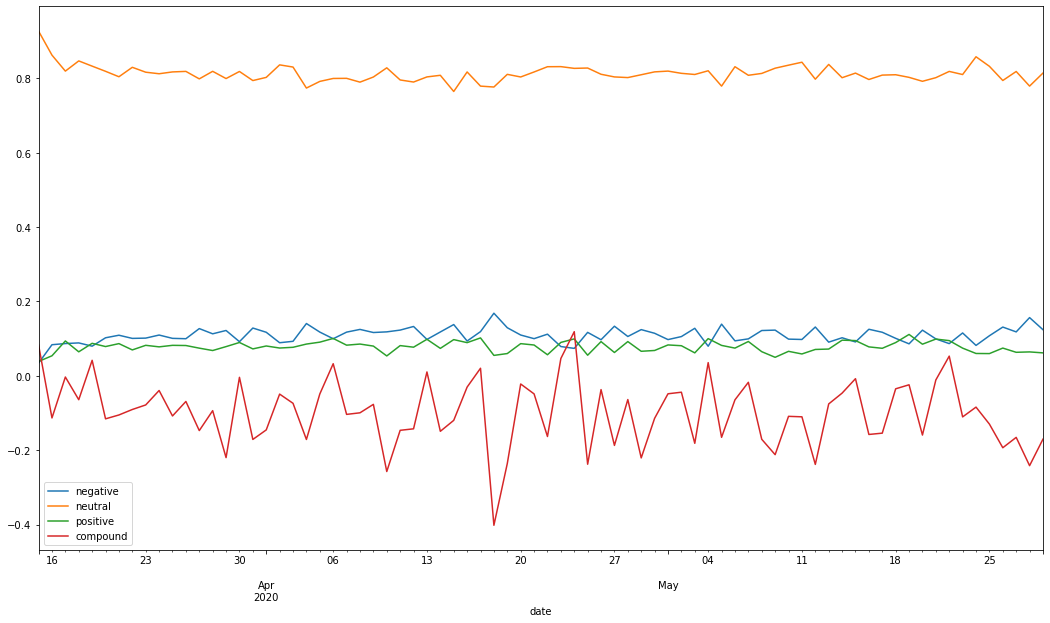

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

av_daily.plot(figsize = (18,10), subplots=False, legend=True)
plt.show()

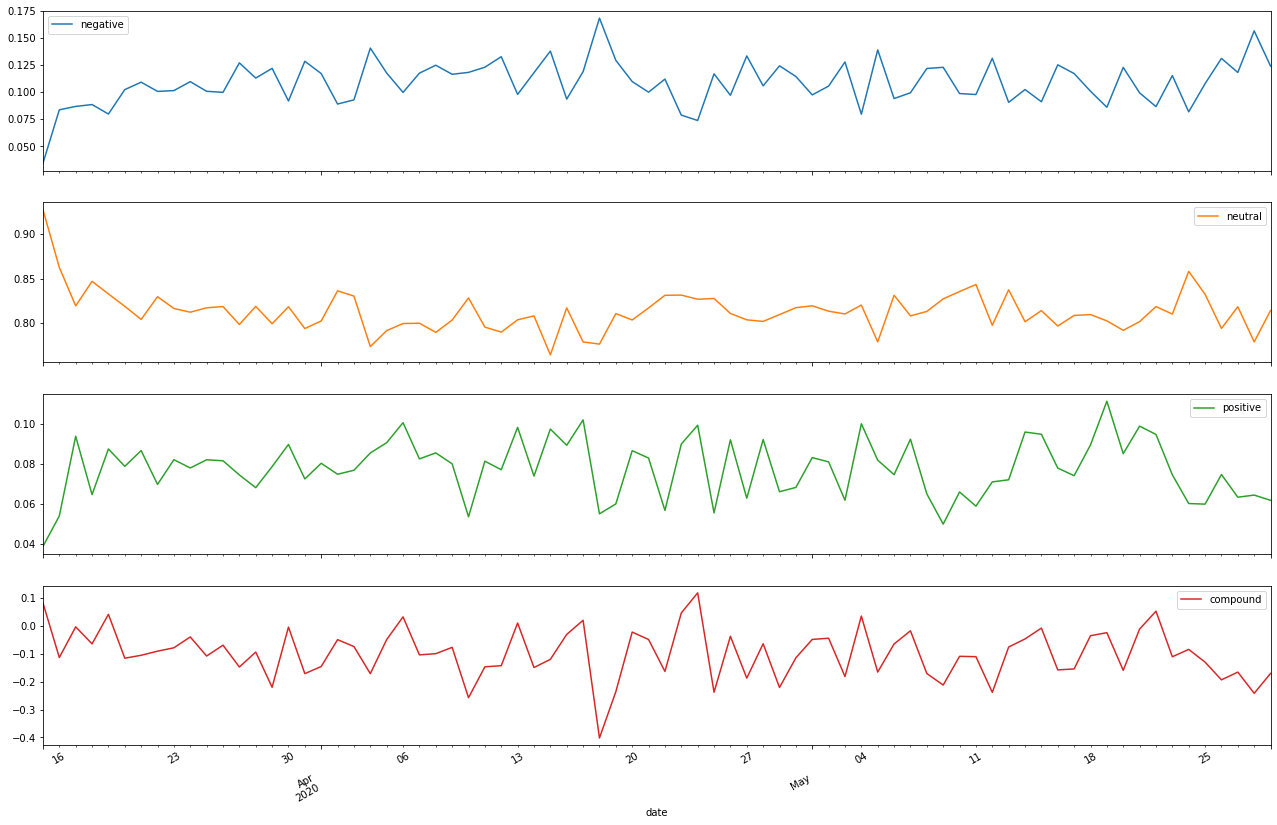

In [24]:
# Plot the yearly groups as subplots
av_daily.plot(figsize = (22,15), subplots=True, legend=True)
plt.show()

## Ngram Exploration

In [25]:
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
np.random.seed(0)

In [26]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [27]:
unigrams = get_top_n_words(df['cleaned_text'],50)

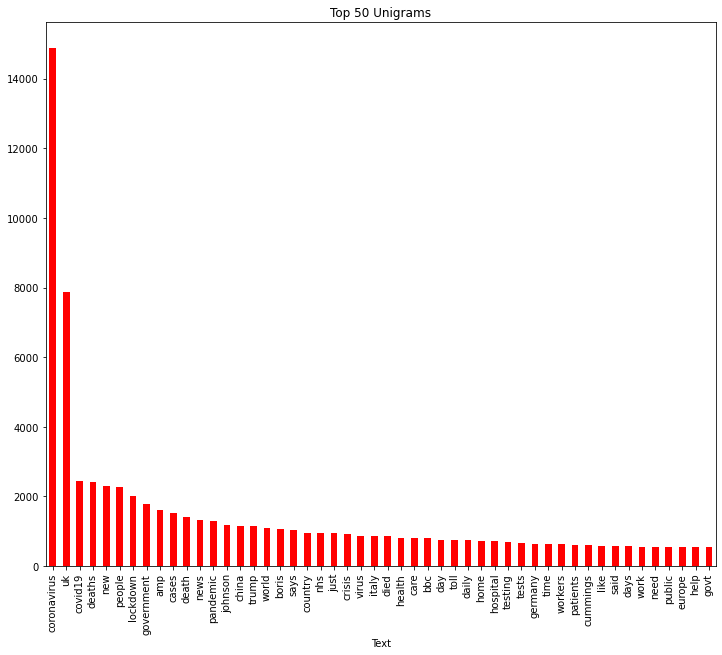

In [28]:
df_uni = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
df_uni.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',color='red', figsize=(12, 10), title='Top 50 Unigrams');

In [29]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [30]:
bigrams = get_top_n_gram(df['cleaned_text'],(2,2),50)

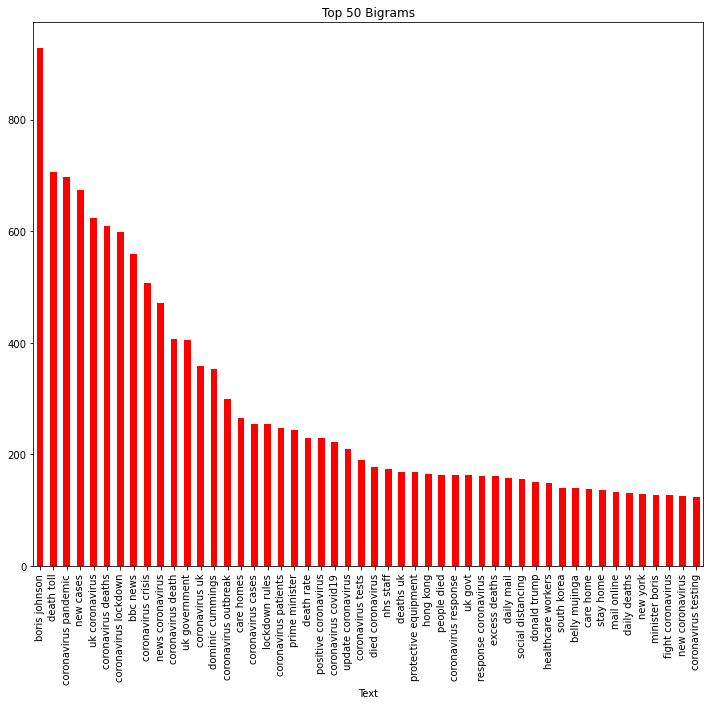

In [31]:
df_bigram = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
df_bigram.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',color='red', figsize=(12, 10), title='Top 50 Bigrams');

In [32]:
trigrams = get_top_n_gram(df['cleaned_text'],(3,3),20)

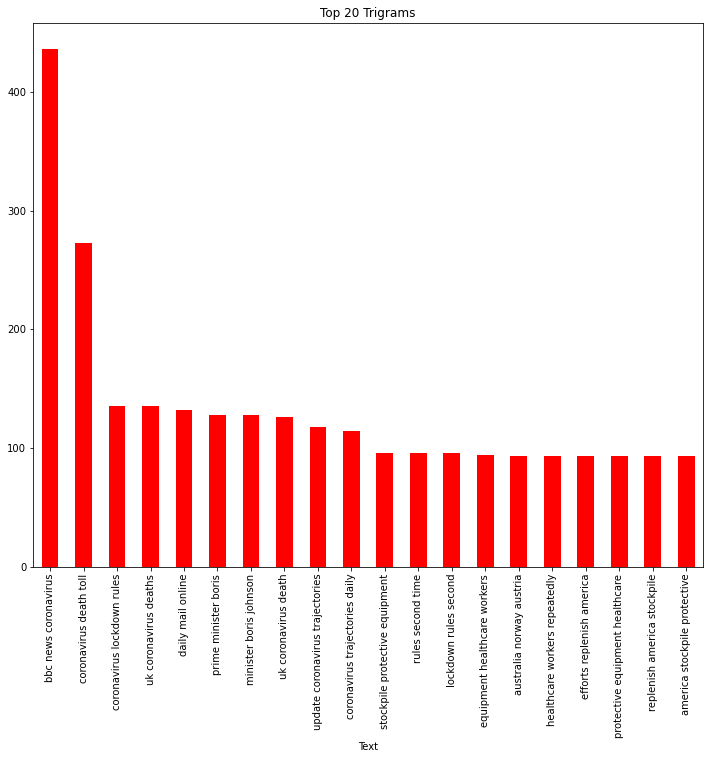

In [33]:
df_trigrams = pd.DataFrame(trigrams, columns = ['Text' , 'count'])
df_trigrams.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',color='red', figsize=(12, 10), title='Top 20 Trigrams');

The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

positive sentiment: compound score >= 0.05

neutral sentiment: (compound score > -0.05) and (compound score < 0.05)

negative sentiment: compound score <= -0.05

The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [34]:
df['vader_score'] = df['compound'].apply(lambda x: 1 if x >= 0.05 else (-1 if x <= -0.05 else 0))

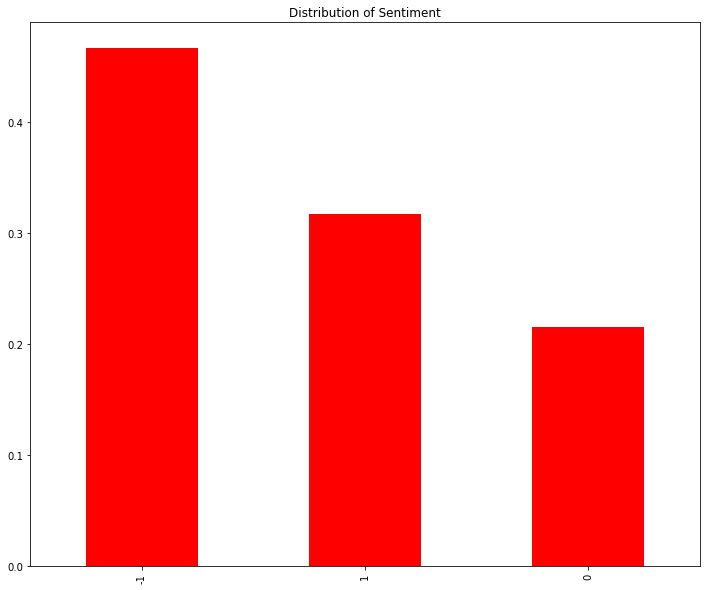

In [39]:
df['vader_score'].value_counts(normalize=True).plot(kind='bar',
                                                      color='red',
                                                      figsize=(12, 10),
                                                      title='Distribution of Sentiment');

In [41]:
df['text_len'] = df['cleaned_text'].astype(str).apply(len)
df['text_word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))

In [42]:
pos = df[df['vader_score']== 1]
neg = df[df['vader_score']== -1]
neutral = df[df['vader_score']== 0]

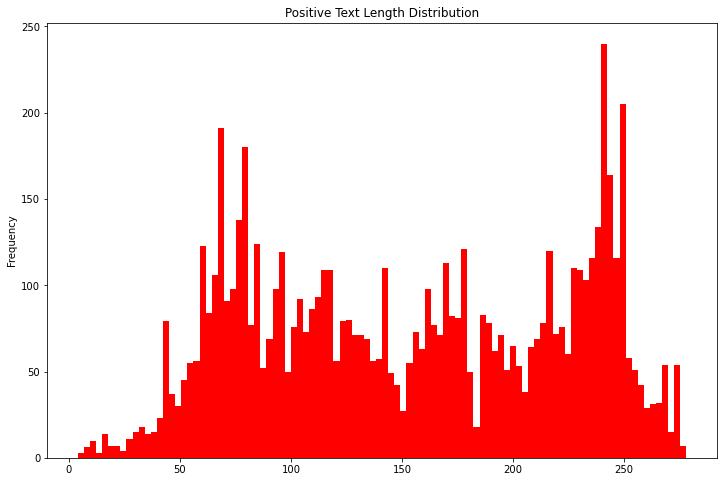

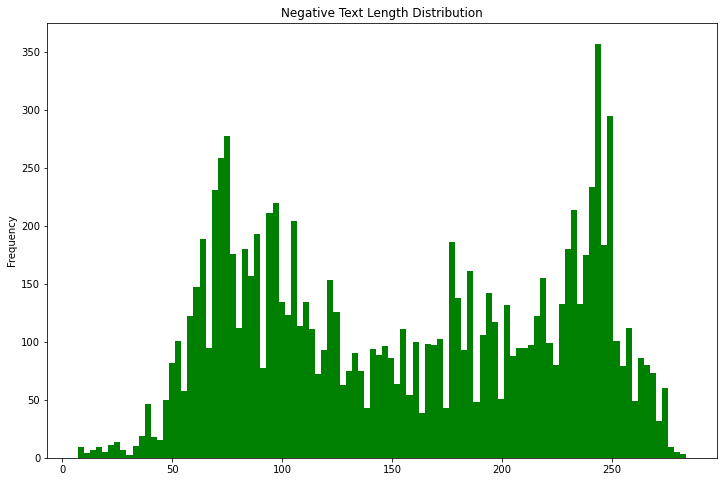

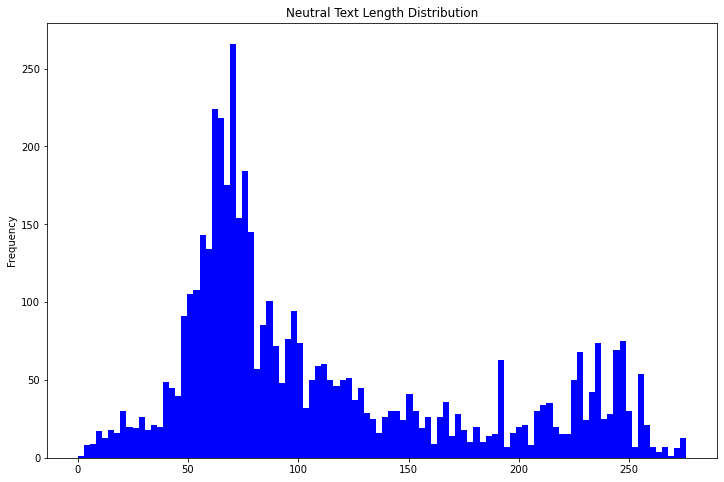

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
pos['text_len'].plot(
    kind='hist',
    bins=100,
    color='red',
    title='Positive Text Length Distribution');

fig, ax = plt.subplots(figsize=(12,8))
neg['text_len'].plot(
    kind='hist',
    bins=100,
    color='green',
    title='Negative Text Length Distribution');

fig, ax = plt.subplots(figsize=(12,8))
neutral['text_len'].plot(
    kind='hist',
    bins=100,
    color='blue',
    title='Neutral Text Length Distribution');

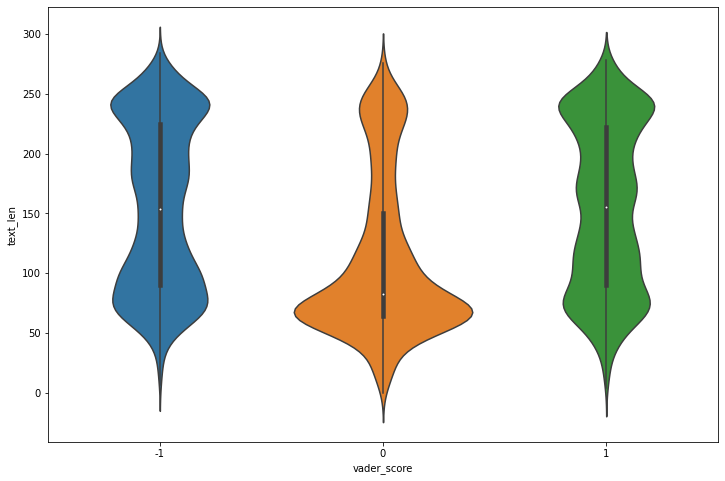

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.violinplot(x="vader_score", y='text_len', data=df);